## Imports

In [1]:
import feedforward as ff
import numpy as np
import matplotlib.pyplot as plt


# The digit data from http://mnist-decoded.000webhostapp.com/
# which they have already decoded.
train_image_path="digit_data/mnist-train-images-tiff/"
train_label_path="digit_data/mnist-train-labels.txt"
test_image_path="digit_data/mnist-test-images-tiff/"
test_label_path="digit_data/mnist-test-labels.txt"

Test init: passed
Test feedforward: passed
Test backprop: passed
Test update: passed


## Sizes

In [2]:
m = 1000
nx = 28 * 28

## Labels

In [3]:
labels = np.fromfile(test_label_path, dtype=int, sep="\n")
#one-hot encoded the labels
y = np.eye(10)[labels].T[:,:m]
assert y.shape == (10, m), "y.shape={}, (nx={}, m={})".format(y.shape, nx, m)

## Images

shape = (28, 28)


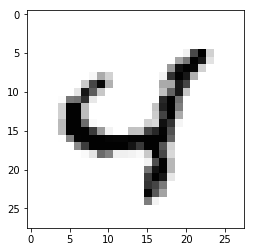

In [4]:
im = plt.imread(test_image_path + "00068.tif")
plt.imshow(im, cmap="gray")
print("shape = {}".format(im.shape))

In [5]:

X = np.zeros((nx, m))
for i in range(m):
    im = plt.imread(test_image_path + "{0:05d}.tif".format(i+1))
    X[:,i] = np.reshape(im, nx)
    
assert X.shape == (nx, m)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


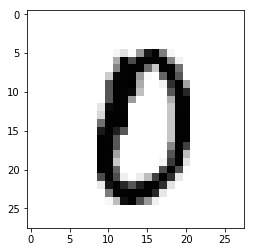

In [6]:
# Check images and labels line up
ind = 55
print(y[:,ind])
plt.imshow(X[:,ind].reshape((28,28)), cmap="gray")

In [13]:
W, b = ff.init([nx, 300, 10])
num_iterations = 100
for it in range(num_iterations):
    W, b = ff.train(X, y, W, b, [ff.sigmoid, ff.sigmoid], [ff.dsigmoid, ff.dsigmoid], ff.sum_sqr_err, ff.dsum_sqr_err, 0.01, 1000)
    A, _ = ff.feedforward(X, W, b, [ff.sigmoid, ff.sigmoid])
    if it % 100 == 0:
        print(ff.sum_sqr_err(A[-1], y))
    

[[45.45923428]
 [40.94067168]
 [ 5.85009792]
 [42.88733301]
 [ 5.50993626]
 [45.64896607]
 [ 6.04813791]
 [ 5.06554493]
 [ 8.67184191]
 [ 4.70000005]]


In [8]:
A, _ = ff.feedforward(X, W, b, [ff.sigmoid, ff.sigmoid])
A[-1][:,ind]

array([0.12630923, 0.03770897, 0.01292086, 0.4403197 , 0.02151995,
       0.00251657, 0.55034265, 0.92336352, 0.08002022, 0.83873566])

In [9]:
A[-1].shape

(10, 1000)